In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import optunity

# Search space

In [35]:
L = np.linspace(0,3,200)
theta_max = np.rad2deg(np.arctan(0.8/L))
theta_min = np.rad2deg(np.arctan(0.1/L))

/home/jlobatop/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/jlobatop/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
def theta(beta, M1, gamma):
    # Constraints of the function
    if np.rad2deg(beta) < 0:
        return 10
    elif np.rad2deg(beta) > 90:
        return 10
    else:
        # Negative sign is used to minime the maximum point
        return -np.arctan(2*(M1**2*(np.sin(beta))**2-1)/((np.tan(beta))*(M1**2*(gamma+np.cos(2*beta))+2)))

In [37]:
M1 = 2
gamma = 1.4

In [38]:
minimum = optimize.fmin(theta, np.deg2rad(20), args=(M1, gamma))
detached = -np.rad2deg(theta(minimum[0],M1,gamma))

Optimization terminated successfully.
         Current function value: -0.400964
         Iterations: 18
         Function evaluations: 36


Text(0.5,1,'Search space')

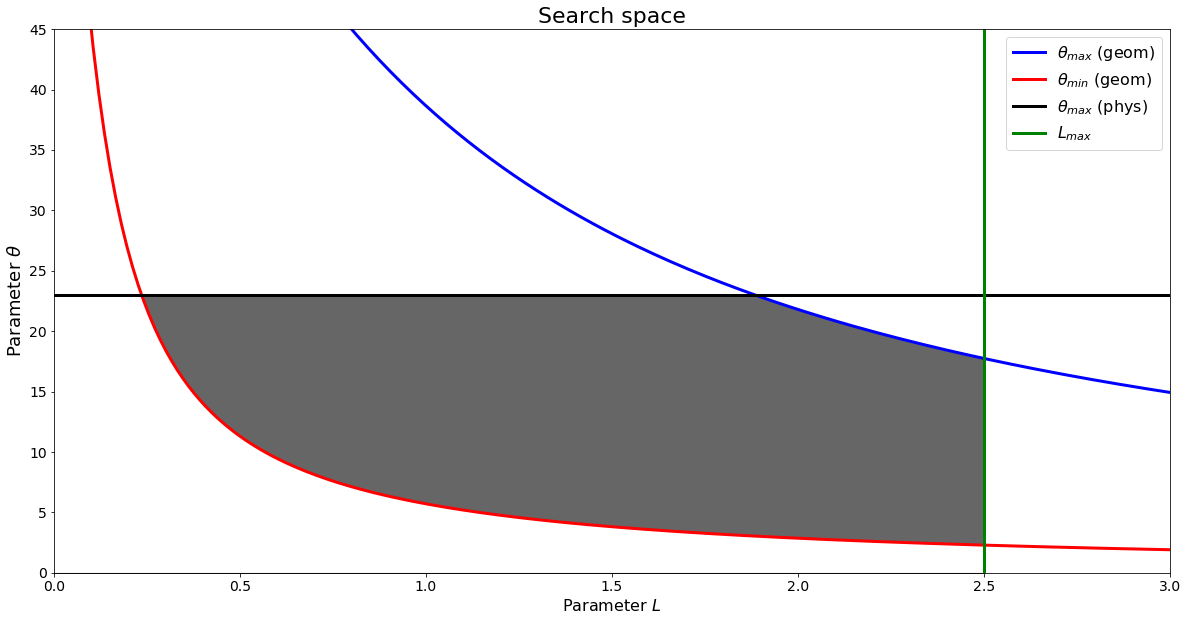

In [39]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(L,theta_max,'b',linewidth=3,label=r'$\theta_{max}$ (geom)')
ax.plot(L,theta_min,'r',linewidth=3,label=r'$\theta_{min}$ (geom)')
ax.plot([0,3.0],[detached,detached],'k',linewidth=3,label=r'$\theta_{max}$ (phys)')
ax.plot([2.5,2.5],[0,45],'g',linewidth=3,label=r'$L_{max}$')
ax.set_xlim([L.min(),L.max()])
ax.set_ylim([0,45])
ax.fill_between(L,detached*np.ones(len(L)),color='k',alpha=0.6)
ax.fill_between(L,100*np.ones(len(L)),theta_max,color='w')
ax.fill_between(L,theta_min,color='w')
ax.fill_between([2.5,3.0],[45,45],color='w')
ax.set_xlabel('Parameter $L$',fontsize=16)
ax.set_ylabel(r'Parameter $\theta$',fontsize=18)
ax.legend(fontsize=16, loc='best')
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title('Search space', fontsize = 22)

# Function definition

In [72]:
def constraint(L,theta):
    # Preallocation space for input points
    boolMat = np.zeros([len(L)])
    # Create the boolean matrix
    for i in range(len(L)):
        if L[i] > 2.5:
            boolMat[i] = True
        elif theta[i] > 22.9735:
            boolMat[i] = True
        elif L[i]*np.tan(np.deg2rad(theta[i])) > 0.8:
            boolMat[i] = True
        elif L[i]*np.tan(np.deg2rad(theta[i])) < 0.1:
            boolMat[i] = True
        else:
            boolMat[i] = False
    return boolMat

In [76]:
test = constraint(sobol[:,0], sobol[:,1])

In [81]:
x_low = L[np.argwhere(theta_min < detached)[0][0]]
x_high = 2.5
y_low = theta_min[np.argwhere(L > 2.5)[0][0]]
y_high = detached

# Sobol sampling initialization
x1, x2 = zip(*optunity.solvers.Sobol.i4_sobol_generate(2, 32, int(np.sqrt(32))))
sobol = np.vstack(((x_high - x_low) * np.array([x1]) + x_low,
                   (y_high - y_low) * np.array([x2]) + y_low)).T

# Unconstraint Sobol
while sum(constraint(sobol[:,0], sobol[:,1])) != 0:
    boolMat = constraint(sobol[:,0], sobol[:,1])
    for i in np.argwhere(boolMat == True):
        sobol[i] = np.array([x_low+np.random.rand(1)*(x_high-x_low),y_low+np.random.rand(1)*(y_high-y_low)]).T

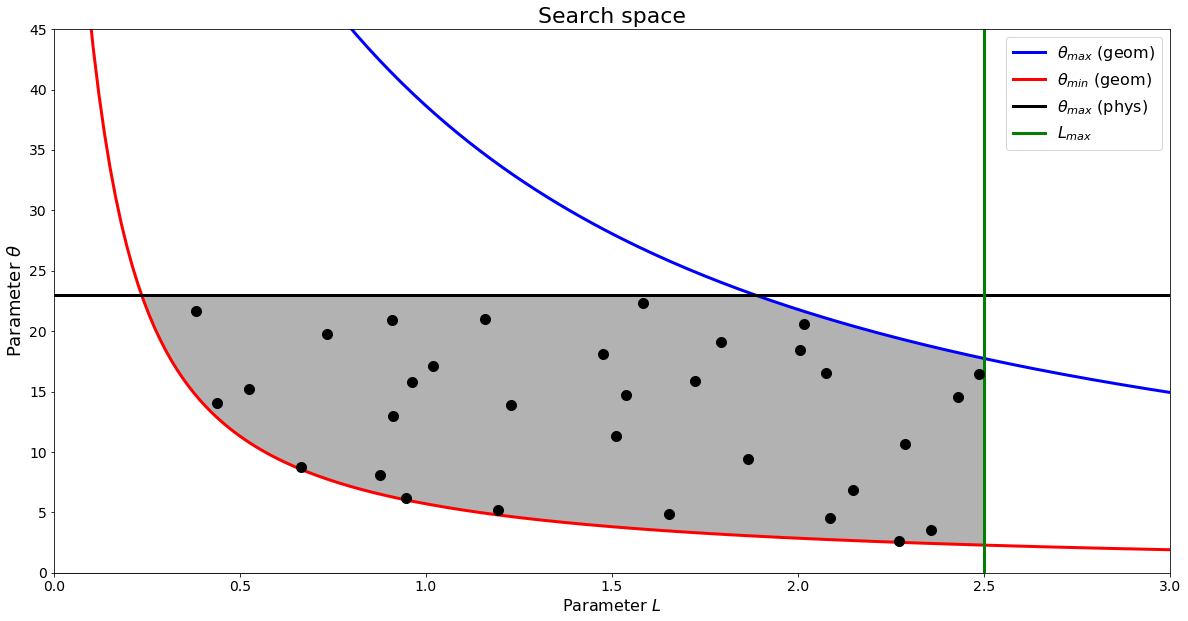

In [84]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(L,theta_max,'b',linewidth=3,label=r'$\theta_{max}$ (geom)')
ax.plot(L,theta_min,'r',linewidth=3,label=r'$\theta_{min}$ (geom)')
ax.plot([0,3.0],[detached,detached],'k',linewidth=3,label=r'$\theta_{max}$ (phys)')
ax.plot([2.5,2.5],[0,45],'g',linewidth=3,label=r'$L_{max}$')
ax.set_xlim([L.min(),L.max()])
ax.set_ylim([0,45])
ax.fill_between(L,detached*np.ones(len(L)),color='k',alpha=0.3)
ax.fill_between(L,100*np.ones(len(L)),theta_max,color='w')
ax.fill_between(L,theta_min,color='w')
ax.fill_between([2.5,3.0],[45,45],color='w')
ax.set_xlabel('Parameter $L$',fontsize=16)
ax.set_ylabel(r'Parameter $\theta$',fontsize=18)
ax.legend(fontsize=16, loc='best')
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title('Search space', fontsize = 22)
ax.plot(sobol[:,0],sobol[:,1],'ko',markersize=10)

In [93]:
sobol[np.argsort(sobol[:,0]),:]

array([[ 0.38238065, 21.68070554],
       [ 0.43913491, 14.07024483],
       [ 0.52355528, 15.21657459],
       [ 0.6647299 ,  8.75244363],
       [ 0.73531721, 19.74146626],
       [ 0.87649183,  8.10603054],
       [ 0.90919891, 20.89530791],
       [ 0.91178549, 12.95412875],
       [ 0.94707915,  6.16679125],
       [ 0.96284609, 15.82637779],
       [ 1.01766646, 17.15581387],
       [ 1.15884108, 21.03429245],
       [ 1.19413474,  5.19717161],
       [ 1.22942839, 13.9237484 ],
       [ 1.47648398, 18.12543352],
       [ 1.51177764, 11.33809602],
       [ 1.5372612 , 14.72743017],
       [ 1.58236495, 22.32711864],
       [ 1.65295226,  4.87396506],
       [ 1.72353957, 15.86298768],
       [ 1.79412688, 19.09505316],
       [ 1.8647142 ,  9.39885673],
       [ 2.00588882, 18.44864006],
       [ 2.01622205, 20.6015834 ],
       [ 2.07647613, 16.50940078],
       [ 2.0872465 ,  4.5025174 ],
       [ 2.14706344,  6.81320435],
       [ 2.2714774 ,  2.6419511 ],
       [ 2.28823807,